# CVDP-FFTs
Running FFT analysis on Adam Phillip's CVDP post-processed output. This is done (1) to make sure that I'm using FFT analysis correctly (because it is also used on raw FGCO2 output) and (2) that we're understanding the CVDP output right. Are we finding power at the proper frequencies for ENSO, PDO, etc?

In [11]:
import glob

# Numerics
import numpy as np
import pandas as pd
import xarray as xr

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.basemap import Basemap

# Statistical Things
import statsmodels.api as sm
import scipy.fftpack
from scipy import signal

# Functions

In [12]:
def detrend(x):
    return signal.detrend(x)

In [32]:
def FFT(data, freq='M'):
    if freq == 'M':
        fa = 1.0/(30*24*60*60)
    elif freq == 'D':
        fa = 1.0/(24*60*60)
    hann = np.hanning(len(data))
    Y = np.fft.fft(hann * data)
    N = len(Y)/2 + 1
    X = np.linspace(0, fa/2, N, endpoint=True)
    output = 2.0*np.abs(Y[:N])/N
    
    # Plot
    fig = plt.figure(figsize=(18,4))    
    plt.plot(X, output, '-k')
    

# Process CVDP Data

In [3]:
fileDir = '/glade/p/work/rbrady/cesmLE_CVDP/extracted_vars/'
ds_cvdp = xr.open_mfdataset(fileDir + '*.nc', decode_times=False, concat_dim='ensemble')

In [4]:
ds_cvdp = ds_cvdp.rename({'npo_pc_mon': 'npo',
                          'pdo_timeseries_mon': 'pdo',
                          'amo_timeseries_mon': 'amo',
                          'ipo_timeseries_mon': 'ipo',
                          'nao_pc_mon': 'nao',
                          'sam_pc_mon': 'sam'})

In [5]:
times = pd.date_range('1920-01', '2016-01', freq='M')
ds_cvdp['time'] = times

In [13]:
ds_cvdp = ds_cvdp.apply(detrend)
ds_cvdp

<xarray.Dataset>
Dimensions:   (ensemble: 34, time: 1152)
Coordinates:
  * time      (time) datetime64[ns] 1920-01-31 1920-02-29 1920-03-31 ...
  * ensemble  (ensemble) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
Data variables:
    sam       (ensemble, time) float64 -1.583 0.2343 0.1021 0.8707 -0.7071 ...
    nino34    (ensemble, time) float64 -0.4906 -0.4019 -0.2497 -0.1845 ...
    pdo       (ensemble, time) float64 1.629 1.23 1.159 0.9966 0.6402 0.4121 ...
    ipo       (ensemble, time) float64 1.712 1.711 1.709 1.705 1.7 1.694 ...
    amo       (ensemble, time) float64 -0.05558 -0.1023 -0.09887 -0.1737 ...
    npo       (ensemble, time) float64 -1.751 1.857 0.8834 1.349 0.5042 ...
    nao       (ensemble, time) float64 -0.08533 1.005 1.197 -2.187 0.5715 ...

# FFT Analysis

In [26]:
data = ds_cvdp['nino34'][0]
hann = np.hanning(len(data))

In [27]:
Y = np.fft.fft(hann*data)
N = len(Y)/2+1

In [28]:
fa = 1.0/(30*24*60*60) # Sampled once every month
print('fa=%.10fHz (Frequency)' % fa)
X = np.linspace(0, fa/2, N, endpoint=True)

fa=0.0000003858Hz (Frequency)


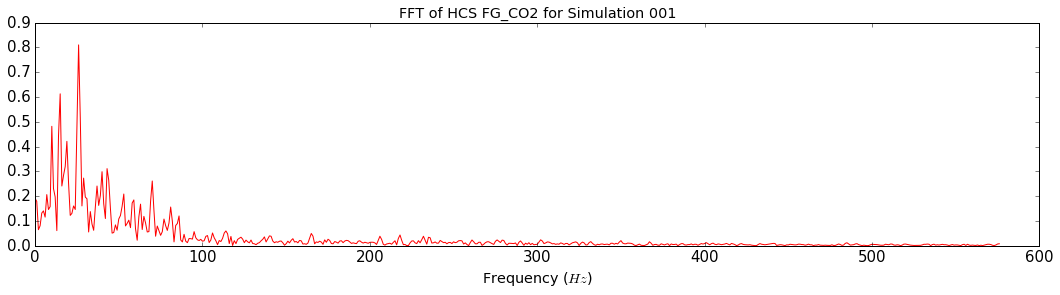

In [44]:
fig = plt.figure(figsize=(18,4))
plt.plot(X, 2.0*np.abs(Y[:N])/N, color='r')
plt.xlabel('Frequency ($Hz$)', size='x-large')
plt.title('FFT of HCS FG_CO2 for Simulation 001', size='x-large')
plt.tick_params(axis='both', which='major', labelsize=15)

(0, 120)

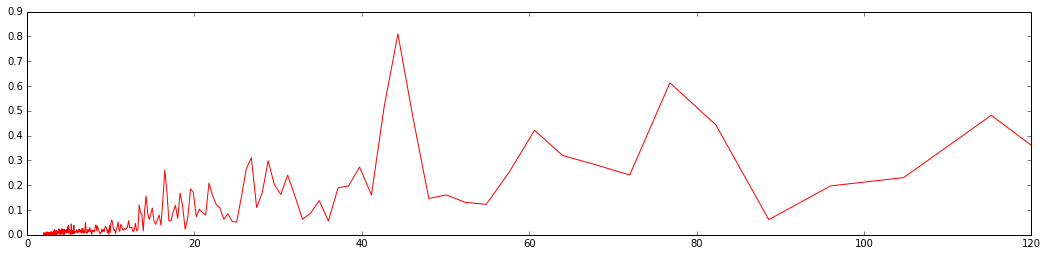

In [43]:
Xp = 1.0/X # in seconds
Xpd= Xp/(30.0*24.0*60.0*60.0)
fig = plt.figure(figsize=(18,4))
plt.plot(Xpd, 2.0*np.abs(Y[:N])/N, color='r')
plt.xlim([0, 120])

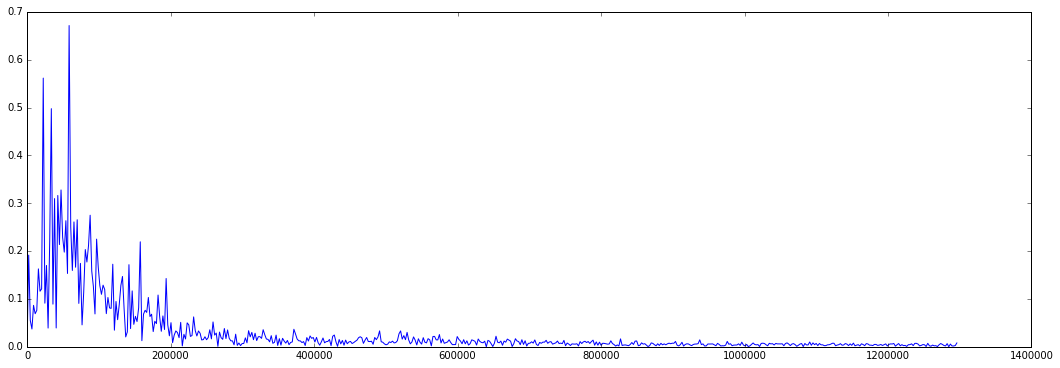

In [49]:
Y = ds_cvdp['nino34'][0]
N = len(data)
T = 1.0 / (60 * 60 * 24 * 30)
X = np.linspace(0.0, N*T, N)

yf = np.fft.fft(Y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig = plt.figure(figsize=(18,6))
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))


2253.913043478261